In [34]:
"""
Created on Thu Apr 16 17:25:36 2020

@author: maddalena
"""
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import matplotlib.gridspec as gridspec

In [35]:
# The SIR model differential equations.
def deriv(y, t, N, beta,gamma):
    S,I,R = y

    dSdt = -(beta*I/N)*S 
    dIdt = (beta*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

In [36]:
#Integration of the differential equations
    
def time_evo(N,beta,gamma,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,beta,gamma))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,R)

In [37]:
#Show the result

fin_result=time_evo(1000,0.5,1/14)

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]

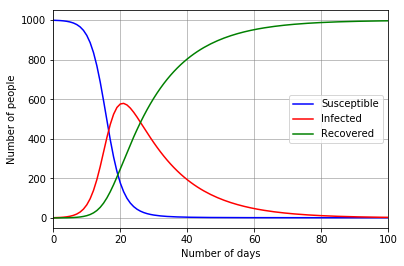

In [38]:
#SIR MODEL PLOT

plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered')
#plt.plot(t, m_vec, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend(loc=5)
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,100)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
#plt.savefig('plotsir05.png',dpi=300)
plt.show()

In [39]:
#IMPORT FILES WORLD
#i files sono: le righe sono le nazioni, le colonne i giorni del mese (DATE).

file_confirmed='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
file_deaths='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
file_recovered='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_confirmed=pd.read_csv(file_confirmed)
df_deaths=pd.read_csv(file_deaths)
df_recovered=pd.read_csv(file_recovered)

In [40]:
#Data manipulation and representation (World)

deaths_world=df_deaths.iloc[:,-1].sum()
recovered_world=df_recovered.iloc[:,-1].sum()
total_world=df_confirmed.iloc[:,-1].sum()

max_death_rate=round(deaths_world/(deaths_world+recovered_world)*100,1)
min_death_rate=round(deaths_world/total_world*100,1)

print('Total contaminated:',total_world)
print('Total deaths:',deaths_world)
print('Total recovered:',recovered_world)

print('Based on the WHO data, the death rate is between',min_death_rate,'% and',max_death_rate,'% of the confirmed case')

Total contaminated: 8488976
Total deaths: 453981
Total recovered: 4155099
Based on the WHO data, the death rate is between 5.3 % and 9.8 % of the confirmed case


In [41]:
def mortality_rate(f_asympt):
    recovered_tot=recovered_world+f_asympt*total_world
    return deaths_world/(deaths_world+recovered_tot)

print(mortality_rate(1)*100)
print(mortality_rate(2)*100)

f_asympt_grid=np.arange(0,2.5,0.1)

3.4660181633060665
2.103026483677793


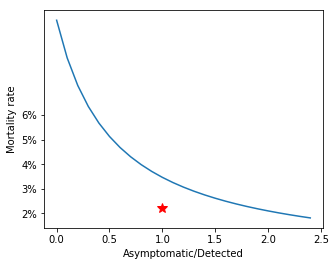

In [42]:
plt.figure(figsize=(5,4))
plt.plot(f_asympt_grid,mortality_rate(f_asympt_grid)*100)
plt.xlabel('Asymptomatic/Detected')
plt.ylabel('Mortality rate')
plt.yticks([1,2,3,4,5,6],['1%','2%','3%','4%','5%','6%'])
plt.plot(1,2.2,marker='*',color='red',markersize=11)
#plt.savefig('mortality_rate_plot.png',dpi=300)
plt.show()

In [43]:
def func_plot(df):
    y_world=[]
    n_cols=df.shape[1]
    #print(n_cols)
    for i in range(n_cols-4):
        y_world.append(df.iloc[:,i+4].sum())
    
    x_world2=df.columns[4:]
    x_world=pd.to_datetime(x_world2,infer_datetime_format=False)
    
    return (x_world,y_world)

peppe=func_plot(df_confirmed)

In [44]:
######## INPUT PARAMETERS ########
country='Italy'
t0=pd.to_datetime('2020-01-22')
#################################

mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
mask_coun_rec=df_recovered['Country/Region']==country

df_confirmed_coun=df_confirmed.loc[mask_coun,:]
df_deaths_coun=df_deaths.loc[mask_coun,:]
df_recovered_coun=df_recovered.loc[mask_coun_rec,:]

#somma tutte le ultime colonne (cioè valori dell'ultimo giorno) 
#dei 3 files, deaths, recovered, confirmed, per avere il TOT mondiale 
deaths_world_coun=df_deaths_coun.iloc[:,-1].sum()
recovered_world_coun=df_recovered_coun.iloc[:,-1].sum()
total_world_coun=df_confirmed_coun.iloc[:,-1].sum()

max_death_rate_coun=round(deaths_world_coun/(deaths_world_coun+recovered_world_coun)*100,1)
min_death_rate_coun=round(deaths_world_coun/total_world_coun*100,1)

print('Total contaminated:',country,total_world_coun)
print('Total deaths',country,deaths_world_coun)
print('Total recovered ',country,recovered_world_coun)

print('Based on the WHO data, the death rate in',country,'is between',min_death_rate_coun,'% and',max_death_rate_coun,'% of the total confirmed case')

Total contaminated: Italy 238159
Total deaths Italy 34514
Total recovered  Italy 180544
Based on the WHO data, the death rate in Italy is between 14.5 % and 16.0 % of the total confirmed case


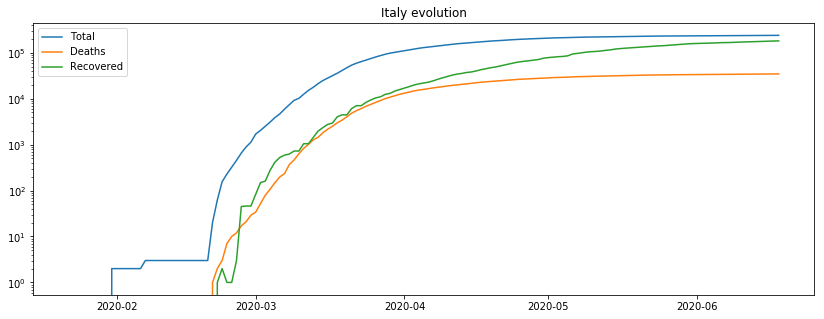

In [45]:
plt.figure(figsize=(14,5))
plt.plot(func_plot(df_confirmed_coun)[0],func_plot(df_confirmed_coun)[1],label='Total')
plt.plot(func_plot(df_deaths_coun)[0],func_plot(df_deaths_coun)[1],label='Deaths')
plt.plot(func_plot(df_recovered_coun)[0],func_plot(df_recovered_coun)[1],label='Recovered')
plt.legend()
plt.yscale('log')
plt.title(country+' evolution')
#plt.savefig('country_plot.png',dpi=300)
plt.show()

In [46]:
ytot=np.array(func_plot(df_confirmed_coun)[1])
ydeaths=np.array(func_plot(df_deaths_coun)[1])
yrec=np.array(func_plot(df_recovered_coun)[1])

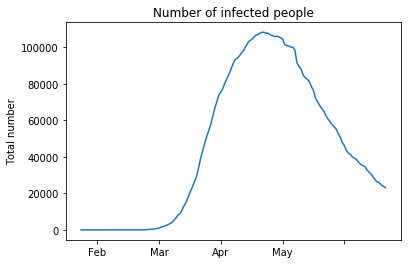

In [47]:
plt.plot(ytot-ydeaths-yrec)
#plt.yscale('log')
plt.xticks(np.arange(8,130,30),['Feb','Mar','Apr','May'])
plt.ylabel('Total number')
plt.title('Number of infected people')
#plt.savefig('activegermany.png',dpi=300)
plt.show()

In [48]:
#Generalization to other countries

def whichcountry(name):
        
    ######## INPUT PARAMETERS ########
    country=name
    t0=pd.to_datetime('2020-01-22')
    #################################

    mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
    mask_coun_rec=df_recovered['Country/Region']==country

    df_confirmed_C=df_confirmed.loc[mask_coun,:]
    df_deaths_C=df_deaths.loc[mask_coun,:]
    df_recovered_C=df_recovered.loc[mask_coun_rec,:]

    ytot=np.array(func_plot(df_confirmed_C)[1])
    ydeaths=np.array(func_plot(df_deaths_C)[1])
    yrec=np.array(func_plot(df_recovered_C)[1])

    return ytot-ydeaths-yrec, ytot[-1], yrec[-1],ydeaths[-1]

In [49]:
print(whichcountry('Italy')[0])#confirmed last day
print(whichcountry('Italy')[2])#recovered last day

[     0      0      0      0      0      0      0      0      0      2
      2      2      2      2      2      2      3      3      3      3
      3      3      3      3      3      3      3      3      3      3
     19     59    150    221    311    438    593    821   1053   1577
   1835   2263   2706   3296   3916   5061   6387   7985   8794  10590
  13052  14955  17750  20603  23073  26062  28710  33190  38549  42681
  46638  50826  54030  57521  62013  66414  70065  73880  75528  77635
  80572  83049  85388  88274  91246  93187  94067  95262  96877  98273
 100269 102253 103616 104291 105418 106607 106962 107771 108257 108237
 107709 107699 106848 106527 105847 106103 105813 105205 104657 101551
 100943 100704 100179  99980  98467  91528  89624  87961  84842  83324
  82488  81266  78457  76440  72070  70187  68351  66553  65129  62752
  60960  59322  57752  56594  55300  52942  50966  47986  46175  43691
  42075  41367  39893  39297  38429  36976  35877  35262  34730  32872
  3171

In [50]:
#definition of time
df_time=pd.to_datetime(np.arange(len(ytot)),unit='D',origin=pd.Timestamp('2020-01-22'))

# list of top countries , with the higher number of cases

df_nofcases=pd.DataFrame(np.array(df_confirmed.iloc[:,1]))
df_nofcases.columns=['Country']
df_nofcases['Confirmed']=df_confirmed.iloc[:,-1]

df_nofcases
#np.array(df_nofcases.sort_values(by='Confirmed',ascending=False).head(6)['Country'])

,Country,Confirmed
0,Afghanistan,27532
1,Albania,1788
2,Algeria,11385
3,Andorra,855
4,Angola,166
5,Antigua and Barbuda,26
6,Argentina,37510
7,Armenia,18698
8,Australia,108
9,Australia,3143


In [51]:
countries_list=['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']

In [52]:
df_active=pd.DataFrame(whichcountry(countries_list[0])[0])
df_active.columns=[countries_list[0]]
df_active.index=df_time

for i in range(0,len(countries_list)):
    df_active[countries_list[i]]=whichcountry(countries_list[i])[0]

df_active.columns=['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']
print(df_active[-1:])

            Albania  Armenia  Austria  Azerbaijan  Belarus  Belgium  \
2020-06-18      663    10829      434        4998    22303    33941   

            Bosnia and Herzegovina  Bulgaria  Cyprus  Croatia  ...  Romania  \
2020-06-18                     787      1543     148       20  ...     5299   

            Serbia  Slovakia  Slovenia  Spain  Sweden  Switzerland  Turkey  \
2020-06-18     589        91        43  67756   50990          344   23127   

            Ukraine  United Kingdom  
2020-06-18    17856          258249  

[1 rows x 47 columns]


In [53]:
print(df_active['Germany'])

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
2020-01-27        1
2020-01-28        4
2020-01-29        4
2020-01-30        4
2020-01-31        5
2020-02-01        8
2020-02-02       10
2020-02-03       12
2020-02-04       12
2020-02-05       12
2020-02-06       12
2020-02-07       13
2020-02-08       13
2020-02-09       14
2020-02-10       14
2020-02-11       16
2020-02-12       16
2020-02-13       15
2020-02-14       15
2020-02-15       15
2020-02-16       15
2020-02-17       15
2020-02-18        4
2020-02-19        4
2020-02-20        4
              ...  
2020-05-20    13363
2020-05-21    12731
2020-05-22    12418
2020-05-23    12009
2020-05-24    11764
2020-05-25    11092
2020-05-26    10861
2020-05-27    10276
2020-05-28    10366
2020-05-29    10173
2020-05-30     9751
2020-05-31     9518
2020-06-01     9407
2020-06-02     8707
2020-06-03     8066
2020-06-04     7928
2020-06-05     7786
2020-06-06     7819
2020-06-07     7841


In [54]:
df_active.to_csv('active_infected',index=True)

In [55]:
data = pd.read_csv('active_infected')
#print(data['Italy'])

In [56]:
xdata=pd.to_numeric(range(data.shape[0]))
print(xdata)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148]


In [57]:
n_countries = len(countries_list)

In [58]:
today=len(xdata)

In [59]:
array_country=whichcountry('Italy')[0]

def minimizer(R0,t1=today-5,t2=today):
    array_country_bis=array_country
    
    #true data
    ydata_inf_2=array_country[t1:t2]
    xdata_2=np.arange(0,len(ydata_inf_2))
    
    #model
    fin_result=time_evo(60*10**6,1/14*R0,1/14,I0=ydata_inf_2[0])
    i_vec=fin_result[2]
    i_vec_2=i_vec[0:len(xdata_2)]
    
    #average error
    error=np.sum(np.abs(ydata_inf_2-i_vec_2)/ydata_inf_2)*100
    return error

minimizer_vec=np.vectorize(minimizer)

In [60]:
#definition of the ideal r0

xgrid=np.arange(0.01,1.3,0.01)
ygrid=minimizer_vec(xgrid)#calcola per la prima
r0_ideal=round(xgrid[np.argmin(ygrid)],2)

In [61]:
#time(minimizer_vec(xgrid))

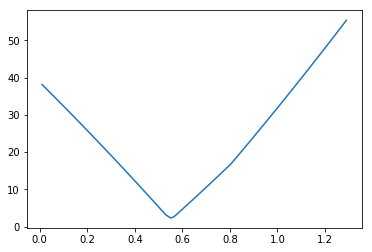

0.55


In [62]:
plt.plot(xgrid,ygrid)
plt.show()
print(r0_ideal)

In [63]:
time_window=5

def minimizer_gen(t1,t2,xgrid=np.arange(0.1,5,0.01)):

    ygrid=minimizer_vec(xgrid,t1=t1,t2=t2)
    r0_ideal=round(xgrid[np.argmin(ygrid)],2)

    return r0_ideal

In [64]:
print(whichcountry(countries_list[0])[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   2  10  11  22  32  37  41
  50  54  57  62  68  72  85  98 108 124 151 147 156 169 168 176 177 185
 198 214 237 240 230 224 221 211 213 206 212 203 218 215 230 220 222 231
 238 251 251 257 282 288 286 289 281 272 263 239 233 229 219 206 206 199
 198 187 187 163 161 173 180 188 200 190 176 175 167 173 175 177 177 193
 205 220 215 232 232 233 240 253 266 269 273 274 284 305 327 349 346 389
 441 499 571 607 663]


In [65]:
r0_time=[]
scangrid=np.linspace(0,5,100)
array_country=whichcountry(countries_list[0])[0] #inizializzo

for name in range(0, len(countries_list)):
    print(countries_list[name],array_country)
    
    for i in range(0,today-(time_window-1)):
        min_val=minimizer_gen(i,i+time_window,scangrid)
        r0_time.append(min_val)
        scangrid=np.linspace(0,min_val+5,200)
        print(i,min_val)
        
    array_country=whichcountry(countries_list[name+1])[0]

Albania [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   2  10  11  22  32  37  41
  50  54  57  62  68  72  85  98 108 124 151 147 156 169 168 176 177 185
 198 214 237 240 230 224 221 211 213 206 212 203 218 215 230 220 222 231
 238 251 251 257 282 288 286 289 281 272 263 239 233 229 219 206 206 199
 198 187 187 163 161 173 180 188 200 190 176 175 167 173 175 177 177 193
 205 220 215 232 232 233 240 253 266 269 273 274 284 305 327 349 346 389
 441 499 571 607 663]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12

/Users/luigigiuseppeatzeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 5.0
48 5.58
49 6.49
50 3.93
51 2.83
52 2.52
53 2.53
54 2.01
55 2.01
56 2.22
57 2.47
58 2.63
59 2.91
60 2.78
61 2.42
62 2.42
63 2.09
64 1.39
65 1.64
66 1.5
67 1.27
68 1.45
69 1.56
70 1.88
71 1.97
72 1.89
73 1.32
74 0.76
75 0.55
76 0.73
77 0.72
78 0.75
79 0.87
80 0.97
81 1.17
82 1.18
83 1.4
84 1.06
85 1.19
86 1.03
87 1.36
88 1.5
89 1.37
90 1.38
91 1.47
92 1.46
93 1.49
94 1.11
95 0.89
96 0.77
97 0.55
98 0.33
99 0.29
100 0.35
101 0.59
102 0.56
103 0.5
104 0.58
105 0.76
106 0.67
107 0.57
108 0.28
109 0.32
110 0.64
111 1.47
112 1.76
113 1.56
114 1.25
115 0.75
116 0.38
117 0.43
118 0.93
119 1.01
120 1.27
121 1.17
122 1.46
123 1.69
124 2.02
125 1.66
126 1.44
127 1.23
128 1.38
129 1.15
130 1.42
131 1.52
132 1.54
133 1.35
134 1.18
135 1.24
136 1.54
137 1

49 5.99
50 5.58
51 2.13
52 3.22
53 3.3
54 3.29
55 3.33
56 2.01
57 2.32
58 0.7
59 0.83
60 0.76
61 0.32
62 1.18
63 1.3
64 1.58
65 2.81
66 2.94
67 4.63
68 4.11
69 5.59
70 6.86
71 4.29
72 4.57
73 4.42
74 4.21
75 4.44
76 4.32
77 4.4
78 3.64
79 2.87
80 2.89
81 2.82
82 2.75
83 2.69
84 2.05
85 1.74
86 2.13
87 2.36
88 2.96
89 2.0
90 1.93
91 2.05
92 2.02
93 2.01
94 2.15
95 2.08
96 1.92
97 1.77
98 1.63
99 1.7
100 1.78
101 1.64
102 1.43
103 1.32
104 1.3
105 1.36
106 1.44
107 1.49
108 1.5
109 1.4
110 1.32
111 1.24
112 1.29
113 1.26
114 1.35
115 1.37
116 1.28
117 1.2
118 1.12
119 1.17
120 1.15
121 1.24
122 1.22
123 1.19
124 1.09
125 1.07
126 1.13
127 1.17
128 1.24
129 1.22
130 1.16
131 1.02
132 0.94
133 0.96
134 1.02
135 1.12
136 1.14
137 1.08
138 0.92
139 0.8
140 0.79
141 0.76
142 0.9
143 0.89
144 0.89
Belgium [    0     0     0     0     0     0     0     0     0     0     0     0
     0     1     1     1     1     1     1     1     1     1     1     1
     1     1     0     0     0     0     0   

/Users/luigigiuseppeatzeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 5.0
40 10.0
41 10.25
42 8.81
43 7.36
44 4.66
45 3.16
46 3.03
47 2.82
48 4.28
49 4.66
50 5.87
51 3.93
52 3.72
53 3.37
54 3.36
55 3.44
56 3.65
57 3.48
58 2.81
59 2.86
60 2.49
61 3.09
62 3.58
63 3.66
64 3.18
65 3.21
66 2.35
67 1.96
68 1.85
69 1.96
70 2.03
71 1.94
72 1.81
73 1.61
74 1.63
75 1.6
76 1.56
77 1.62
78 1.53
79 1.44
80 1.49
81 1.47
82 1.5
83 1.63
84 1.3
85 1.36
86 1.41
87 1.42
88 1.39
89 1.28
90 1.26
91 1.29
92 1.3
93 1.2
94 1.15
95 1.14
96 1.11
97 1.07
98 1.07
99 1.07
100 1.07
101 1.07
102 1.04
103 1.03
104 1.03
105 1.12
106 1.11
107 1.11
108 1.07
109 1.07
110 1.04
111 1.0
112 1.06
113 1.07
114 1.07
115 1.07
116 1.07
117 1.04
118 1.03
119 1.06
120 1.07
121 1.07
122 1.04
123 1.03
124 1.03
125 1.03
126 1.03
127 1.03
128 1.03
129 1.03
130 1.03
131 1.0
132 0.99
133 1.02
134 1.03
135 1.03
136 1.03
137 1.03
138 1.03
139 1.03
140 1.03
141 1.03
142 1.03
143 1.03
144 

114 0.0
115 0.0
116 0.08
117 0.0
118 0.0
119 0.0
120 0.0
121 0.0
122 0.2
123 0.05
124 0.05
125 0.33
126 0.0
127 0.0
128 0.0
129 0.0
130 0.0
131 0.0
132 0.0
133 0.0
134 0.0
135 0.0
136 0.0
137 0.0
138 0.0
139 0.65
140 0.0
141 0.0
142 0.58
143 0.0
144 0.55
Czechia [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    3    3    5
    8   12   18   19   31   31   41   91   94  141  189  253  295  393
  461  691  829  989 1113 1229 1381 1638 1906 2259 2609 2790 2953 3232
 3408 3747 3966 4335 4424 4623 4757 4980 5156 5267 5291 5389 5397 5308
 5231 5292 5202 5198 5262 5147 5079 4935 4825 4688 4681 4639 4396 4329
 4244 4132 4125 4049 3946 3760 3633 3507 3390 3391 3372 3369 3183 3049
 2932 2817 2730 2737 2715 2648 2619 2587 2522 2476 2532 2562 2503 2463
 2399 2361 2377 2365 2390 2339 2355 2364 2359 2321 2355 2410 2375 2370
 2383 2361 2394 2444 2469 2

2 3.42
3 2.33
4 2.8
5 3.37
6 2.4
7 1.64
8 1.67
9 1.84
10 1.0
11 0.99
12 0.99
13 0.99
14 3.13
15 3.15
16 3.81
17 0.97
18 0.3
19 0.08
20 0.0
21 0.13
22 0.0
23 0.0
24 1.01
25 1.0
26 0.99
27 0.99
28 0.99
29 0.99
30 0.0
31 0.0
32 0.0
33 0.0
34 5.0
35 10.0
36 8.14
37 7.13
38 5.0
39 4.97
40 4.36
41 6.63
42 5.9
43 6.19
44 4.55
45 3.94
46 3.46
47 4.85
48 4.26
49 3.4
50 4.73
51 3.62
52 3.51
53 4.28
54 3.22
55 3.26
56 3.03
57 2.62
58 2.41
59 2.35
60 2.95
61 2.4
62 2.6
63 2.64
64 2.42
65 2.35
66 2.18
67 2.42
68 1.94
69 1.53
70 1.38
71 1.54
72 1.38
73 1.31
74 1.33
75 1.27
76 1.35
77 1.34
78 2.64
79 2.69
80 3.13
81 1.51
82 1.5
83 1.27
84 1.45
85 1.07
86 1.13
87 1.26
88 0.91
89 0.86
90 0.82
91 1.02
92 1.03
93 1.15
94 1.02
95 1.0
96 0.81
97 0.7
98 0.95
99 0.99
100 1.02
101 1.0
102 1.03
103 1.06
104 1.1
105 1.01
106 1.03
107 1.0
108 0.96
109 0.9
110 0.89
111 0.92
112 0.92
113 0.92
114 0.92
115 0.92
116 0.98
117 0.99
118 0.96
119 0.99
120 0.99
121 0.96
122 0.93
123 0.92
124 1.04
125 1.12
126 1.2
127 1.0

72 1.82
73 1.82
74 1.75
75 2.17
76 2.63
77 2.68
78 2.74
79 1.94
80 1.6
81 1.33
82 1.3
83 1.42
84 1.61
85 1.56
86 1.38
87 1.51
88 1.41
89 1.45
90 1.26
91 1.2
92 1.28
93 1.23
94 1.31
95 1.36
96 1.25
97 1.22
98 1.22
99 1.34
100 1.27
101 1.01
102 0.88
103 0.77
104 0.84
105 0.82
106 0.88
107 0.95
108 0.93
109 0.74
110 0.63
111 0.54
112 0.58
113 0.7
114 0.97
115 1.05
116 1.03
117 0.97
118 0.81
119 0.76
120 0.72
121 0.66
122 0.65
123 0.4
124 0.38
125 0.38
126 0.32
127 0.61
128 0.68
129 1.03
130 1.03
131 1.0
132 0.81
133 0.88
134 0.89
135 0.89
136 0.89
137 0.74
138 0.61
139 0.62
140 0.62
141 0.71
142 0.83
143 0.85
144 0.73
Iceland [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    1    1    3    6   11
   26   34   43   50   50   58   68   84  102  133  155  158  180  219
  244  324  404  450  531  551  595  679  718  791  847  883  927  935
  993 1031 105

89 0.96
90 0.96
91 0.93
92 0.95
93 0.96
94 0.99
95 0.93
96 0.83
97 0.82
98 0.82
99 0.94
100 0.96
101 0.9
102 0.62
103 0.51
104 0.47
105 0.66
106 0.68
107 0.71
108 0.77
109 0.72
110 0.63
111 0.48
112 0.5
113 0.47
114 0.63
115 0.62
116 0.59
117 0.59
118 0.56
119 0.61
120 0.65
121 0.62
122 0.59
123 0.51
124 0.36
125 0.32
126 0.32
127 0.4
128 0.49
129 0.61
130 0.68
131 0.63
132 0.65
133 0.6
134 0.59
135 0.59
136 0.59
137 0.51
138 0.36
139 0.4
140 0.35
141 0.3
142 0.43
143 0.52
144 0.55
Kazakhstan [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    4    6    9   10   33
   35   44   46   53   60   62   72   81  108  146  211  263  280  317
  351  405  429  490  536  610  640  666  713  738  774  842  941 1015
 1039 1108 1182 1221 1259 1386 1487 1601 1709 1853 1930 2010 2090 2228
 2294

5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 1.01
39 1.0
40 0.99
41 3.43
42 4.83
43 5.83
44 3.81
45 5.31
46 4.92
47 9.47
48 9.09
49 8.43
50 6.21
51 4.79
52 5.76
53 7.08
54 7.77
55 6.48
56 6.52
57 4.98
58 3.86
59 3.34
60 3.14
61 3.4
62 2.7
63 2.24
64 2.07
65 2.03
66 1.77
67 1.74
68 1.96
69 1.19
70 1.0
71 0.78
72 1.54
73 1.45
74 1.43
75 1.52
76 1.38
77 1.38
78 1.25
79 1.1
80 1.07
81 1.1
82 1.13
83 1.17
84 1.12
85 1.05
86 1.03
87 1.0
88 1.03
89 0.0
90 0.0
91 0.0
92 0.0
93 0.3
94 0.93
95 0.66
96 0.85
97 0.32
98 0.0
99 0.0
100 0.0
101 0.0
102 0.1
103 0.0
104 0.0
105 0.0
106 0.0
107 0.0
108 0.0
109 0.0
110 0.0
111 0.0
112 0.0
113 0.43
114 0.85
115 1.15
116 0.83
117 1.17
118 0.78
119 0.46
120 0.36
121 0.32
122 0.13
123 0.34
124 0.67
125 0.51
126 0.03
127 0.0
128 0.0
129 0.0
130 0.0
131 0.0
132 0.0
133 0.0
134 0.

6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 5.0
37 10.0
38 7.46
39 7.26
40 7.82
41 8.18
42 8.41
43 6.4
44 5.27
45 4.44
46 3.56
47 4.13
48 4.22
49 3.85
50 4.76
51 3.58
52 3.62
53 3.73
54 3.55
55 3.57
56 3.53
57 3.43
58 3.13
59 2.94
60 2.91
61 3.02
62 2.94
63 2.91
64 2.7
65 2.4
66 2.12
67 1.97
68 1.93
69 1.98
70 1.89
71 1.84
72 1.72
73 1.72
74 1.62
75 1.63
76 1.77
77 1.8
78 1.78
79 1.67
80 1.54
81 1.45
82 1.43
83 1.45
84 1.52
85 1.51
86 1.44
87 1.36
88 1.28
89 1.29
90 1.3
91 1.3
92 1.27
93 1.2
94 1.15
95 1.11
96 1.11
97 1.14
98 1.14
99 1.14
100 1.11
101 1.07
102 1.1
103 1.1
104 1.1
105 1.1
106 1.07
107 1.07
108 1.07
109 1.07
110 1.07
111 1.07
112 1.07
113 1.07
114 1.04
115 1.03
116 1.06
117 1.07
118 1.07
119 1.07
120 1.07
121 1.07
122 1.07
123 1.07
124 1.04
125 1.06
126 1.07
127 1.04
128 1.03
129 1.03
130 1.03
131 1.03
132 1.

45 4.37
46 3.34
47 5.57
48 5.68
49 5.85
50 7.58
51 6.07
52 5.56
53 5.09
54 4.92
55 4.69
56 5.89
57 4.38
58 4.15
59 3.95
60 3.73
61 3.47
62 3.75
63 3.43
64 3.43
65 2.97
66 2.64
67 2.46
68 2.59
69 2.29
70 2.12
71 2.0
72 1.76
73 1.73
74 1.66
75 1.77
76 1.87
77 1.86
78 1.79
79 1.4
80 1.38
81 1.38
82 1.38
83 1.38
84 1.35
85 1.31
86 1.4
87 1.32
88 1.27
89 1.2
90 1.25
91 1.26
92 1.29
93 1.23
94 1.16
95 1.11
96 1.17
97 1.09
98 1.1
99 1.01
100 1.03
101 1.09
102 1.1
103 1.13
104 1.14
105 1.14
106 1.11
107 1.04
108 1.0
109 0.99
110 0.99
111 1.02
112 1.0
113 0.84
114 0.65
115 0.6
116 0.76
117 1.13
118 0.95
119 0.0
120 0.0
121 0.0
122 0.0
123 0.93
124 0.98
125 1.02
126 1.03
127 1.03
128 1.0
129 1.03
130 1.03
131 1.03
132 1.15
133 1.14
134 1.14
135 1.14
136 1.11
137 1.04
138 1.06
139 1.0
140 1.06
141 1.07
142 1.04
143 1.03
144 1.03
Romania [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0

118 0.41
119 0.68
120 0.77
121 0.0
122 0.0
123 0.0
124 0.0
125 0.0
126 0.18
127 0.0
128 0.08
129 1.0
130 1.9
131 3.12
132 2.49
133 2.86
134 3.79
135 3.0
136 1.57
137 1.55
138 1.91
139 1.94
140 1.85
141 2.27
142 2.19
143 2.2
144 2.21
Spain [     0      0      0      0      0      0      0      0      0      0
      1      1      1      1      1      1      1      1      2      2
      2      2      2      2      0      0      0      0      0      0
      0      0      0      0      4     11     13     30     43     82
    118    162    218    254    393    460    626   1013   1628   2040
   2039   4906   5679   6992   9070  10187  12206  16026  17779  21874
  24421  30250  33283  40501  46406  51224  54968  58598  63460  68200
  72084  74974  77488  80002  80925  82897  84689  85407  85610  86524
  87312  87231  87616  86981  88083  90836  96040  96886 100864  98771
 100382 100757 101617  88111  87295  86072  85069  84403  79695  76842
  78623  74234  73300  71240  70230  68466  66866  

94 0.6
95 0.51
96 0.5
97 0.5
98 0.47
99 0.36
100 0.27
101 0.19
102 0.18
103 0.21
104 0.31
105 0.4
106 0.49
107 0.44
108 0.44
109 0.44
110 0.57
111 0.7
112 0.8
113 0.82
114 0.82
115 0.82
116 0.88
117 0.92
118 0.95
119 0.93
120 0.92
121 0.89
122 0.89
123 0.83
124 0.82
125 0.85
126 0.85
127 0.88
128 0.95
129 0.93
130 0.92
131 0.92
132 0.89
133 0.74
134 0.43
135 0.11
136 0.0
137 0.0
138 0.28
139 0.69
140 1.09
141 1.13
142 1.26
143 1.23
144 1.25
Ukraine [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     1     1     1     1     1     1     1
     1     1     1     2     2     2     6    12    12    14    26    43
    69    69    93   139   190   300   342   459   527   618   761   856
  1023  1168  1243  1253  1389  1581  1790  2073  2359  2605  2912  3155
  3513  3859  4291  4698  4961  5200

IndexError: list index out of range

In [66]:
r0_countries0=np.transpose(np.reshape(r0_time, (len(countries_list),today-(time_window-1))))
#print(r0_countries0)

In [67]:
r0_countries_tot=pd.DataFrame(r0_countries0,index=pd.to_datetime(np.arange(len(r0_countries0)),unit='D',origin='2020-01-26'))

r0_countries_tot.columns   = ['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']
print(r0_countries_tot['Germany'].tail())

2020-06-14    0.74
2020-06-15    0.61
2020-06-16    0.70
2020-06-17    0.80
2020-06-18    0.96
Name: Germany, dtype: float64


In [68]:
r0_countries_tot.to_csv('r0_countries.csv',index=True)

In [ ]:
r0_countries_imp = pd.read_csv('r0_countries_no_ita.csv')

In [ ]:
print(r0_countries_imp['Germany'].shape)

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(r0_countries_imp['United Kingdom'])
plt.plot(r0_countries_imp['Germany'])
plt.plot(r0_countries_imp['France'])
plt.plot(r0_countries_imp['Spain'])
plt.plot(r0_countries_imp['Denmark'])
plt.plot(r0_countries_imp['Albania'])
plt.plot(r0_countries_imp['Belarus'])
plt.plot(r0_countries_imp['Sweden'])
plt.xticks(np.arange(0-(time_window-5),93,7),['Jan 26','Jan 2','Feb 9','Feb 16','Feb 23','Mar 1','Mar 8', 'Mar 15', 'Mar 22', 'Mar 29', 'Apr 5', 'Apr 12', 'Apr 19', 'Apr 26'],rotation=20)
plt.xlim(48,52)#today)
plt.ylabel('$R_0$')
plt.ylim(0,9)
plt.grid()
plt.title('Evolution of $R_0$')
#plt.savefig('output_countries/r0-evo_Italy.png',dpi=300)
plt.show()

In [ ]:
r0_file_cut_df=pd.DataFrame(r0_countries_imp.iloc[33:len(r0_countries_imp),:])
#index=range(len(r0_countries_imp)-30))
print(r0_file_cut_df.shape)
#print(r0_file_cut_df)

In [ ]:
andrea_columns=pd.read_csv('https://raw.githubusercontent.com/vincnardelli/covid19-italia/master/nazionale/output/r0.csv')
df_andrea_columns = pd.DataFrame(andrea_columns, )
df_andrea_columns.columns = ['Data','Italy']
dataITA=df_andrea_columns['Italy']
print(df_andrea_columns)

In [ ]:
list_andrea_col=np.array([])
for i in range(len(df_andrea_columns)):
    list_andrea_col = np.append(list_andrea_col, df_andrea_columns['Italy'][i])
print(list_andrea_col.shape)
#list_andrea_col_norm=np.append(list_andrea_col,[len(r0_file_cut_df)])
#print(list_andrea_col_norm)

In [ ]:
r0_file_cut_df.insert(22,'Italy',value=list_andrea_col)

In [ ]:
print(r0_file_cut_df.iloc[:,20:25]) #check

In [ ]:
r0_file_cut_df.to_csv('r0_complete.csv',index=True)